<a href="https://colab.research.google.com/github/rizkyrikat/Data-Analyst/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("/content/data_science_job_posts_2025.csv")
df.head()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea..."
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn..."
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac..."
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']"
4,data scientist,NaN,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[]


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        941 non-null    object
 1   seniority_level  884 non-null    object
 2   status           688 non-null    object
 3   company          944 non-null    object
 4   location         942 non-null    object
 5   post_date        944 non-null    object
 6   headquarter      944 non-null    object
 7   industry         944 non-null    object
 8   ownership        897 non-null    object
 9   company_size     944 non-null    object
 10  revenue          929 non-null    object
 11  salary           944 non-null    object
 12  skills           944 non-null    object
dtypes: object(13)
memory usage: 96.0+ KB


In [98]:
df.describe()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
count,941,884,688,944,942,944,944,944,897,944,929,944,944
unique,4,4,3,420,431,42,197,8,2,510,312,896,400
top,data scientist,senior,on-site,company_134,"Bengaluru, Karnataka, India",a month ago,"San Francisco, CA, US",Technology,Public,900,Private,"€114,169",[]
freq,856,630,363,30,52,167,91,582,579,18,247,3,201


In [99]:
df.isnull().sum()

,0
job_title,3
seniority_level,60
status,256
company,0
location,2
post_date,0
headquarter,0
industry,0
ownership,47
company_size,0


In [100]:
df["job_title"] = df["job_title"].ffill()

In [101]:
df["status"] = df["status"].ffill()

In [102]:
df["location"] = df["location"].bfill()

In [103]:
df["ownership"] = df["ownership"].bfill()

In [104]:
df.isnull().sum()

,0
job_title,0
seniority_level,60
status,0
company,0
location,0
post_date,0
headquarter,0
industry,0
ownership,0
company_size,0


In [105]:
import re

df["company_size"] = df["company_size"].astype(str).apply(lambda x: re.sub(r"[^0-9,]", "", x))

df["company_size"] = df["company_size"].str.replace(",", "")
df["company_size"] = df["company_size"].replace("", np.nan)
df["company_size"] = df["company_size"].astype("float")

df["company_size"] = df["company_size"].fillna(df.mean(numeric_only=True).mean())

In [106]:
df["revenue"] = df["revenue"].astype(str).apply(lambda x: re.sub(r"[^0-9,]", "", x))
df["revenue"] = df["revenue"].replace("", np.nan)

df["revenue"] = df["revenue"].astype("float")

In [107]:
df["revenue"] = df["revenue"].fillna(df.mean(numeric_only=True).mean())

In [108]:
def clean_salary(s):
    if pd.isna(s):
        return np.nan

    # Removing the euro symbol and unnecessary spaces
    s = s.replace("€", "").replace(",", "").strip()

    # If there is a range ("–" or "-"), take the average
    if "–" in s or "-" in s:
        parts = re.split("–|-", s)
        try:
            nums = [
                float(p.strip())
                for p in parts
                if p.strip().replace(".", "", 1).isdigit()
            ]
            if len(nums) == 2:
                return sum(nums) / 2
        except:
            return np.nan

    # Jika angkanya ganjil, langsung masukkan ke float.
    try:
        return float(s)
    except:
        return np.nan

# Apply the function to the column
df["salary"] = df["salary"].apply(clean_salary)

In [109]:
mean_salary_lead = df.loc[df["seniority_level"] == "lead", "salary"].mean()
print(f"mean salary lead: {mean_salary_lead}")

mean_salary_senior = df.loc[df["seniority_level"] == "senior", "salary"].mean()
print(f"mean salary senior: {mean_salary_senior}")

mean_salary_midlevel = df.loc[df["seniority_level"] == "midlevel", "salary"].mean()
print(f"mean salary midlevel: {mean_salary_midlevel}")

mean_salary_junior = df.loc[df["seniority_level"] == "junior", "salary"].mean()
print(f"mean salary junior: {mean_salary_junior}")

mean salary lead: 150339.09913793104
mean salary senior: 135549.15
mean salary midlevel: 100323.6017699115
mean salary junior: 87939.74


In [110]:

df.loc[df["seniority_level"].isna() & (df["salary"] > 150339), "seniority_level"] = "lead"

df.loc[df["seniority_level"].isna() & (df["salary"].between(100323, 150339)), "seniority_level"] = "senior"

df.loc[df["seniority_level"].isna() & (df["salary"].between(87939, 100323)), "seniority_level"] = "midlevel"

df.loc[df["seniority_level"].isna() & (df["salary"] < 87939), "seniority_level"] = "junior"

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        944 non-null    object 
 1   seniority_level  944 non-null    object 
 2   status           944 non-null    object 
 3   company          944 non-null    object 
 4   location         944 non-null    object 
 5   post_date        944 non-null    object 
 6   headquarter      944 non-null    object 
 7   industry         944 non-null    object 
 8   ownership        944 non-null    object 
 9   company_size     944 non-null    float64
 10  revenue          944 non-null    float64
 11  salary           944 non-null    float64
 12  skills           944 non-null    object 
dtypes: float64(3), object(10)
memory usage: 96.0+ KB


In [112]:
df.isnull().sum()

,0
job_title,0
seniority_level,0
status,0
company,0
location,0
post_date,0
headquarter,0
industry,0
ownership,0
company_size,0


In [113]:
df.drop_duplicates(inplace=True)

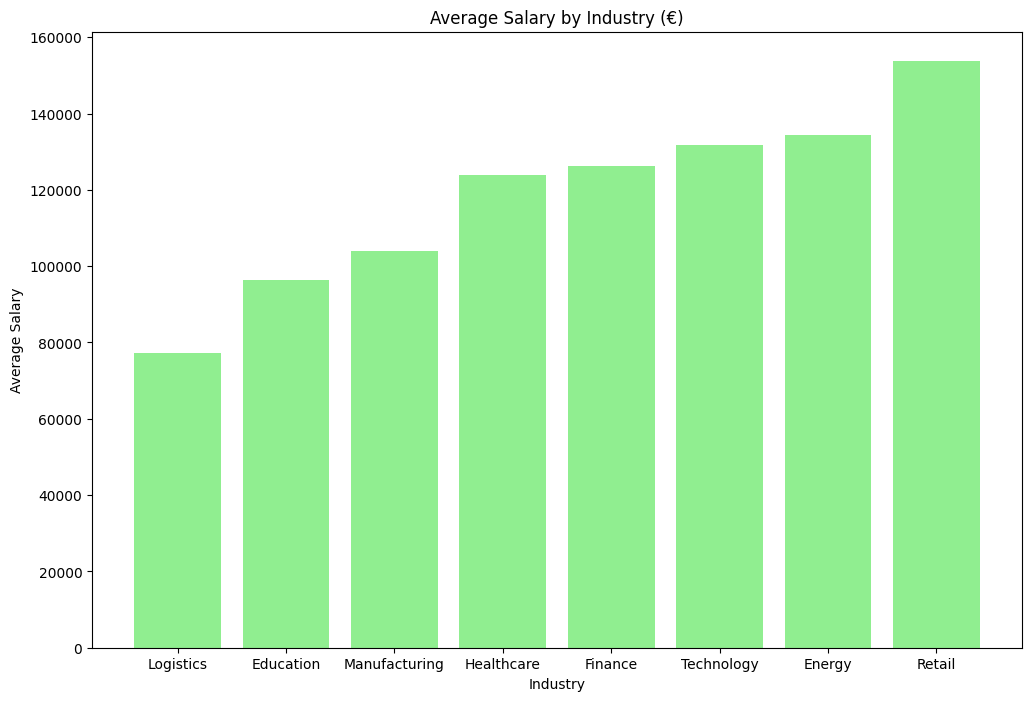

In [114]:
avg_salary_by_industry = df.groupby("industry")["salary"].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
plt.bar(avg_salary_by_industry.index, avg_salary_by_industry.values, color="lightgreen")

plt.title("Average Salary by Industry (€)")
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.show()

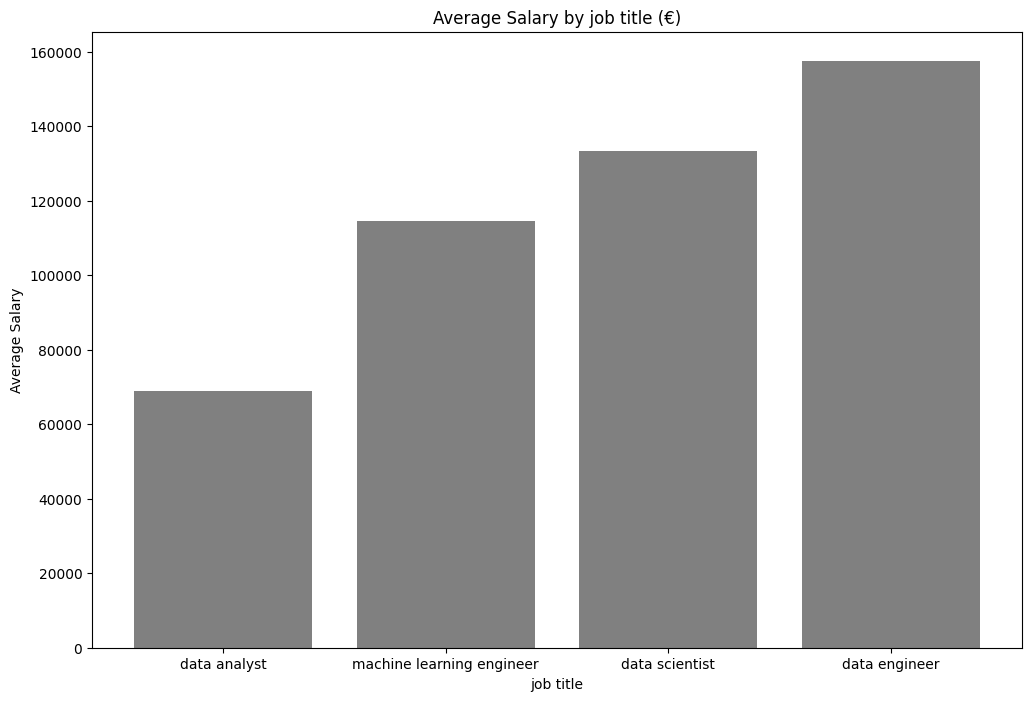

In [125]:
avg_salary_by_job_title = df.groupby("job_title")["salary"].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
plt.bar(avg_salary_by_job_title.index, avg_salary_by_job_title.values, color="gray")

plt.title("Average Salary by job title (€)")
plt.xlabel("job title")
plt.ylabel("Average Salary")
plt.show()

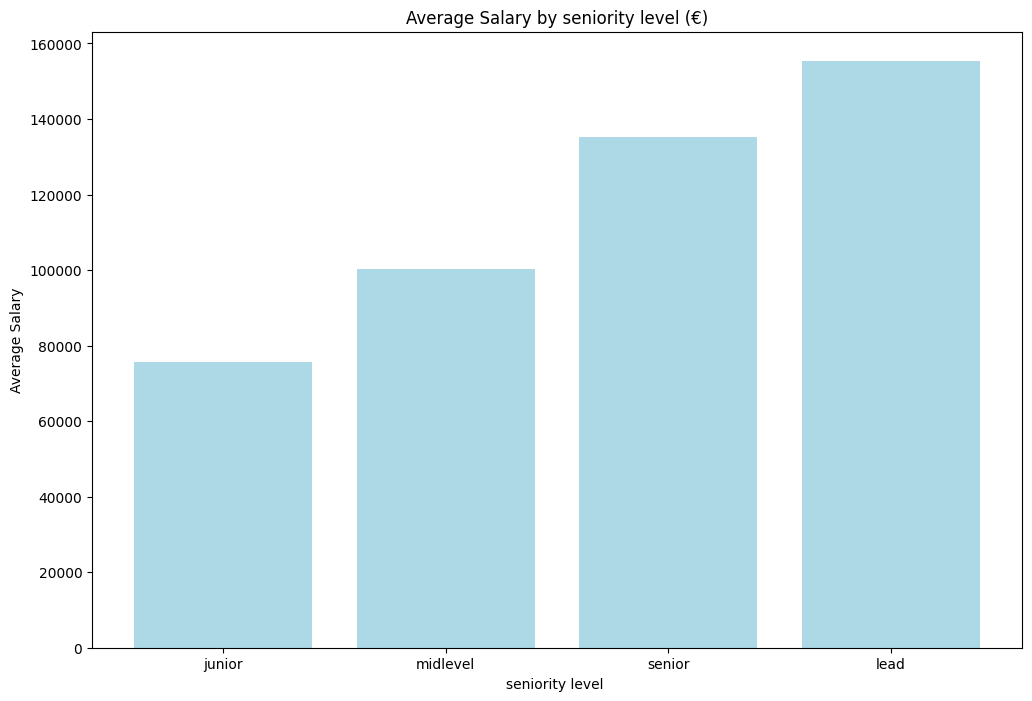

In [127]:
avg_salary_by_seniority_level = df.groupby("seniority_level")["salary"].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
plt.bar(avg_salary_by_seniority_level.index, avg_salary_by_seniority_level.values, color="lightblue")

plt.title("Average Salary by seniority level (€)")
plt.xlabel("seniority level ")
plt.ylabel("Average Salary")
plt.show()